# Taller evaluable sobre la extracción, transformación y visualización de datos usando IPython

**Juan David Velásquez Henao**   
jdvelasq@unal.edu.co  
Universidad Nacional de Colombia, Sede Medellín  
Facultad de Minas  
Medellín, Colombia 

** Desarrollado por**

**Diego Diaz**   
diazdiego01@hotmail.com  
CELEC EP Unidad de Negocio Coca Codo Sinclair
Ecuador

# Instrucciones

En la carpeta 'Taller' del repositorio 'ETVL-IPython' se encuentran los archivos 'Precio_Bolsa_Nacional_($kwh)_'*'.xls' en formato de Microsoft Excel, los cuales contienen los precios históricos horarios de la electricidad para el mercado eléctrico Colombiano entre los años 1995 y 2017 en COL-PESOS/kWh. A partir de la información suministrada resuelva los siguientes puntos usando el lenguaje de programación Python. 

# Listado de Variables

**w** = Matriz procesada para presentacion. 

**wmain** = Matriz de datos sin columnas adicionales

**wmedia** = Matriz de Precios Promedios Diarios

**wmax** = Matriz de Precios Maximo por mes

**wmin** = Matriz de Precios Minimo por mes

**wmedm** = Matriz de Precios Promedios por mes

**wrepl** = Matriz de horas de Precio maximo

**wrepl1** = Matriz de Frecuencia en las horas en las cuales se presentan los precios maximos para los dias laborables

**wrepl1s** = Matriz de Frecuencia en las horas en las cuales se presentan los precios maximos para los dias sabados

**wrepl1d** = Matriz de Frecuencia en las horas en las cuales se presentan los precios maximos para los dias domingos

**wminanio** = Matriz de precios minimos por año

**pmes** = Matriz de Matriz de Precios Promedios por mes con repitencia en los demas dias del mes para graficar en la misma dimension de los precios diarios


# Preguntas

**1.--** Lea los archivos y cree una tabla única concatenando la información para cada uno de los años. Imprima el encabezamiento de la tabla usando `head()`. 

In [1]:
import pandas as pd
import numpy as np
# Se importa pandas y numpy como librerias base para procesar datos

In [2]:
x=[]
w=[]
wmain=[]

for n in range(1995,2018):
    if n<2000:
        sk=3
    else:
        sk=2
    namefile='Precio_Bolsa_Nacional_($kwh)_' + str(n)
    if n>=2016:
        namefile += '.xls'
    else:
        namefile += '.xlsx'
    y=pd.read_excel(namefile,skiprows=sk)
    y=y[list(range(0,25))]
    x.append(y)
w=pd.concat(x)
w.head()
#Leer los archivos en excel con un for para leer todos y con append se ubica uno a continuacion de otro.
#luego con concat se unifica los dataframes en una sola matriz 'w'

,Fecha,0,1,2,3,4,5,6,7,8,...,14,15,16,17,18,19,20,21,22,23
0,1995-07-20,NaN,1.073,1.073,1.073,1.073,1.073,1.073,1.073,1.074,...,1.073,1.073,1.073,1.073,1.074,1.897,1.897,1.897,1.073,1.073
1,1995-07-21,1.073,1.000,1.000,1.000,1.000,1.000,5.000,6.000,6.000,...,5.000,1.000,1.000,5.000,12.000,16.670,11.929,5.000,1.000,1.000
2,1995-07-22,1.073,1.073,1.000,1.000,1.000,1.073,1.303,1.303,1.303,...,1.073,1.000,1.000,1.000,1.303,2.500,2.500,1.303,1.073,1.073
3,1995-07-23,1.073,1.000,1.000,1.000,1.000,1.000,0.100,1.000,1.000,...,1.000,0.100,0.100,1.000,1.238,1.238,1.238,1.238,1.073,1.000
4,1995-07-24,1.000,1.000,0.990,1.000,1.000,1.073,3.000,3.000,3.000,...,1.073,1.073,3.000,2.000,18.630,22.500,9.256,3.000,1.073,1.000


**2.--** Compute e imprima el número de registros con datos faltantes.

In [3]:
len(w)-len(w.dropna())
# Se revisa de la longitud de la matriz principal cuantos elementos estan en blanco

28

**3.--** Compute e imprima el número de registros duplicados.

In [4]:
z=w[w.duplicated()]
len(z)
# Se revisa cuantos elementos se encuentran duplicados.

67

**4.--** Elimine los registros con datos duplicados o datos faltantes, e imprima la cantidad de registros que quedan (registros completos).

In [5]:
w=w.dropna()
w=w.drop_duplicates()
wmain=w.drop_duplicates()
len(w)
#Se elimina a la matiz principal los elementos en blanco y los elementos duplicados se purga la matriz w

7875

**5.--** Compute y grafique el precio promedio diario.

In [6]:
wmedia=wmain.mean(axis=1)
wmedia
w['Promedio']=wmedia
# Se encuentra la matriz de los datos promedio por filas con axis = 1
# Se incluye una columna 'Promedio' en la matriz de visualizacion

In [7]:
import matplotlib as mp
import matplotlib.pyplot as plt
%matplotlib inline
# Se importa las librerias de graficos

<Container object of 7875 artists>

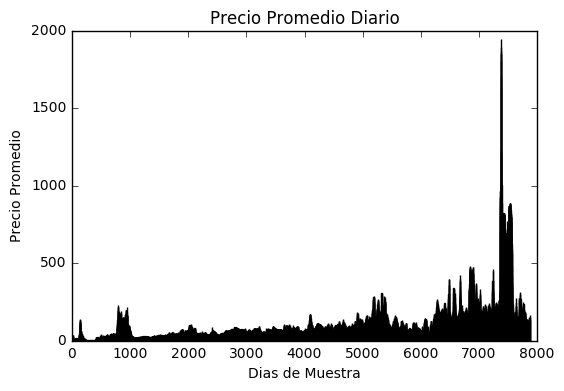

In [8]:
plt.title("Precio Promedio Diario")
plt.xlabel("Dias de Muestra")
plt.ylabel("Precio Promedio")
plt.bar(range(len(wmedia)),wmedia)
#Se grafica la matriz de Precios Promedios Diarios

**6.--** Compute y grafique el precio máximo por mes.

In [9]:
w1=[]
for n in range(len(wmain['Fecha'])):
    w1.append(str(wmain.iloc[n,0])[0:7])
w['key']=w1
wmain['key']=w1
# Se crea una columna unicamente de anio y mes para filtrarla luego

In [10]:
wmax=wmain.groupby('key').max()
wmax=wmax.max(axis=1)
wmax.head()
# Se agrupa por anio y mes y se calcula el valor max, 
#luego se calcula el precio max de la fila para tener un solo valor por anio y mes

key
1995-07     22.500
1995-08     40.000
1995-09     40.572
1995-10     33.700
1995-11    111.907
dtype: float64

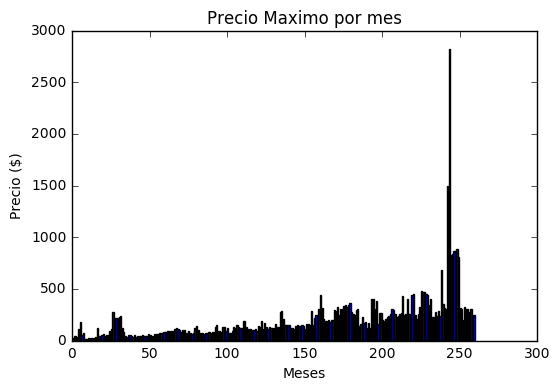

In [11]:
plt.title("Precio Maximo por mes")
plt.xlabel("Meses")
plt.ylabel("Precio ($)")
plt.bar(range(len(wmax)),wmax)
plt.show()
# Se grafica el precio maximo por mes

**7.--** Compute y grafique el precio mínimo mensual.

In [12]:
wmin=wmain.groupby('key').min()
wmin=wmin.min(axis=1)
wmin.head()
# Se agrupa por anio y mes y se calcula el valor min, 
#luego se calcula el precio min de la fila para tener un solo valor por anio y mes

key
1995-07    0.000
1995-08    0.000
1995-09    1.073
1995-10    0.000
1995-11    1.072
dtype: float64

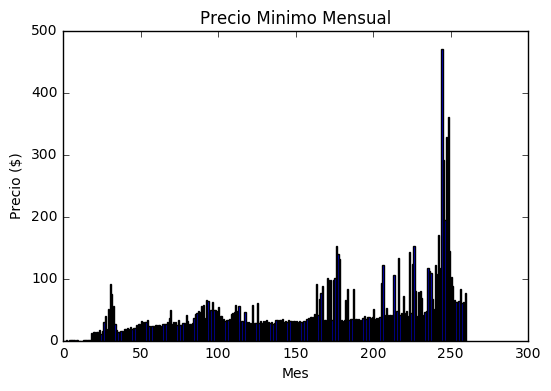

In [13]:
plt.title("Precio Minimo Mensual")
plt.xlabel("Mes")
plt.ylabel("Precio ($)")
plt.bar(range(len(wmin)),wmin)
plt.show()
# Se grafica el precio minimo mensual

**8.--** Haga un gráfico para comparar el precio máximo del mes (para cada mes) y el precio promedio mensual.

In [14]:
wmedm=wmain.groupby('key').mean()
wmedm=wmedm.mean(axis=1)
# Se agrupa por anio y mes y se calcula el valor promedio, 
#luego se calcula el precio medio de la fila para tener un solo valor por anio y mes

In [16]:
import plotly
import plotly.plotly as py  
import plotly.tools as tls
import numpy as np
# Se importa las librerias de graficos

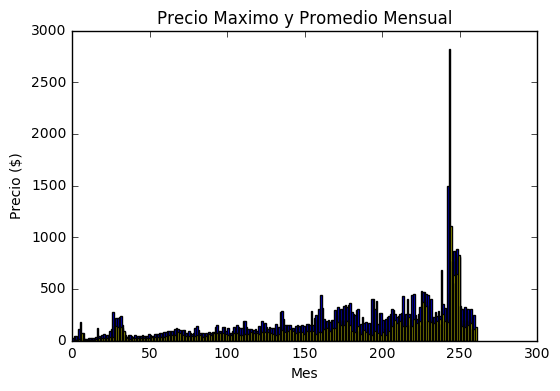

In [17]:
plt.title("Precio Maximo y Promedio Mensual")
plt.xlabel("Mes")
plt.ylabel("Precio ($)")
X = np.arange(len(wmax))
plt.bar(X + 0.00, wmax, color = 'b', width = 1)
plt.bar(X + 1, wmedm, color = 'y', width = 1)
plt.show()
# Se grafica el Precio maximo y promedio mensual en la misma grafica con diferentes colores

**9.--** Haga un histograma que muestre a que horas se produce el máximo precio diario para los días laborales.

In [18]:
import datetime
import calendar
import metakernel
# Se importa librerias de tiempo, aunque no se las uso.

In [19]:
laborable=['L','S','D','L','L','L','L']*int(len(w)/7)
w['Laborable']=laborable
wmain['Laborable']=laborable
wmaxd=wmain.max(axis=1)
w['MaxDia']=wmaxd
w[w['Laborable']=='L'].head()
# Se crea una serie de 7 dias laborables, sabados y domingos para incluir en la tabla esta asignacion para filtrarlo luego
# Se crea la columna 'MaxDia'

,Fecha,0,1,2,3,4,5,6,7,8,...,18,19,20,21,22,23,Promedio,key,Laborable,MaxDia
1,1995-07-21,1.073,1.00,1.000,1.00,1.00,1.000,5.000,6.000,6.000,...,12.000,16.67,11.929,5.000,1.000,1.00,4.924333,1995-07,L,16.67
4,1995-07-24,1.000,1.00,0.990,1.00,1.00,1.073,3.000,3.000,3.000,...,18.630,22.50,9.256,3.000,1.073,1.00,4.305917,1995-07,L,22.50
5,1995-07-25,0.990,0.99,0.989,0.99,0.99,1.073,1.263,1.263,1.263,...,1.263,1.50,1.263,1.263,1.073,0.99,1.149167,1995-07,L,1.50
6,1995-07-26,0.500,0.50,0.500,0.50,0.50,0.990,1.073,1.073,1.073,...,1.073,8.00,1.073,0.990,0.500,0.00,1.108625,1995-07,L,8.00
7,1995-07-27,0.500,0.50,0.500,0.50,0.50,0.500,0.500,0.500,0.500,...,1.073,1.50,0.990,0.500,0.500,0.50,0.585958,1995-07,L,1.50


In [20]:
windex = ['line_{}'.format(n) for n in range(len(w))]
w.index = windex
wlab=w[w['Laborable']=='L']
windex1 = ['line_{}'.format(n) for n in range(len(wlab))]
wlab.index = windex1
wlab.head()

,Fecha,0,1,2,3,4,5,6,7,8,...,18,19,20,21,22,23,Promedio,key,Laborable,MaxDia
line_0,1995-07-21,1.073,1.00,1.000,1.00,1.00,1.000,5.000,6.000,6.000,...,12.000,16.67,11.929,5.000,1.000,1.00,4.924333,1995-07,L,16.67
line_1,1995-07-24,1.000,1.00,0.990,1.00,1.00,1.073,3.000,3.000,3.000,...,18.630,22.50,9.256,3.000,1.073,1.00,4.305917,1995-07,L,22.50
line_2,1995-07-25,0.990,0.99,0.989,0.99,0.99,1.073,1.263,1.263,1.263,...,1.263,1.50,1.263,1.263,1.073,0.99,1.149167,1995-07,L,1.50
line_3,1995-07-26,0.500,0.50,0.500,0.50,0.50,0.990,1.073,1.073,1.073,...,1.073,8.00,1.073,0.990,0.500,0.00,1.108625,1995-07,L,8.00
line_4,1995-07-27,0.500,0.50,0.500,0.50,0.50,0.500,0.500,0.500,0.500,...,1.073,1.50,0.990,0.500,0.500,0.50,0.585958,1995-07,L,1.50


In [21]:
wmaxh=[]
wmaxh1=[]
for n in range(len(wlab)):
    wmaxh1=pd.Series(wlab.loc['line_'+str(n)]).values[1:25]
    wmaxh.append ([i for i,e in enumerate(wmaxh1) if e == max(wmaxh1)])
wmaxh
# Se filtra por dia las horas en las cuales se presentan las horas de precio maximo

[[19],
 [19],
 [19],
 [19],
 [19],
 [10, 11, 18, 19, 20],
 [19],
 [9],
 [6, 13, 16, 21],
 [6, 7, 8, 9, 10, 11, 12, 18, 19, 20, 21],
 [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22],
 [19],
 [7, 19],
 [10, 11],
 [19],
 [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22],
 [6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22],
 [19],
 [19],
 [19],
 [19],
 [0, 1, 2, 3, 4, 5, 19, 22, 23],
 [6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21],
 [19],
 [19],
 [19],
 [19],
 [19],
 [19],
 [19],
 [19],
 [18, 19],
 [19],
 [18, 19],
 [19],
 [18, 19],
 [18],
 [18],
 [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21],
 [19],
 [6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22],
 [18, 19, 20],
 [11, 17, 21],
 [18, 19],
 [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22],
 [18, 19],
 [6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21],
 [18, 19],
 [18, 19],
 [6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 

In [22]:
import statistics
import random
from matplotlib.pylab import hist, show
# Se importa librerias de estadisticas y random para utilizarlo en los histogramas.

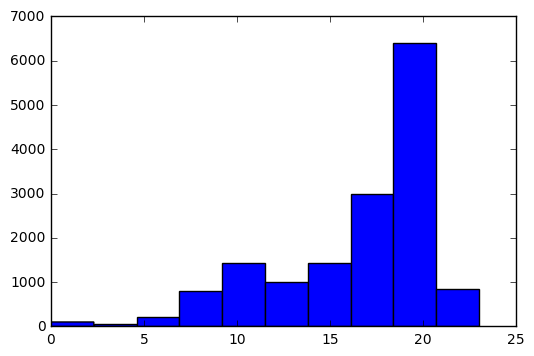

In [23]:
wrepl=[]
for n in range (len(wmaxh)):
        for i in range(len(wmaxh[n])):
               wrepl.append(wmaxh[n][i]) 
hist(wrepl)
show()
# Se calcula una matriz que unifica en un solo arreglo las horas que pertenecen el precio maximo a un solo dia en dias laborables.

In [39]:
wrepl

[19,
 19,
 19,
 19,
 19,
 10,
 11,
 18,
 19,
 20,
 19,
 9,
 6,
 13,
 16,
 21,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 18,
 19,
 20,
 21,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 19,
 7,
 19,
 10,
 11,
 19,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 19,
 19,
 19,
 19,
 0,
 1,
 2,
 3,
 4,
 5,
 19,
 22,
 23,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 18,
 19,
 19,
 18,
 19,
 19,
 18,
 19,
 18,
 18,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 19,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 18,
 19,
 20,
 11,
 17,
 21,
 18,
 19,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 18,
 19,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,

In [24]:
wrepl1=[]
for n in range(24):
        wrepl1.append(wrepl.count(n))
horas=range(24)
# Se calcula una matriz de frecuencia en las horas en las que se produce el precio maximo por dia en dias laborables

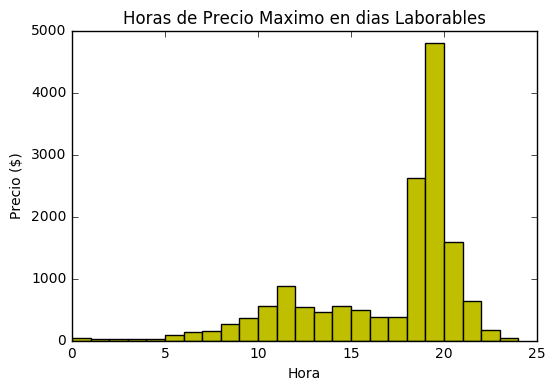

In [25]:
plt.title("Horas de Precio Maximo en dias Laborables")
plt.xlabel("Hora")
plt.ylabel("Precio ($)")
plt.bar(horas, wrepl1, color = 'y', width = 1)
plt.show()
# Se grafica en formato de barras la matriz de frecuencia de repeticion de horas de precios maximos para dias laborables

In [26]:
wrepl1
# Se indica las veces que repite las horas del dia que presentan el precio maximo en dias laborables

[48,
 29,
 24,
 19,
 28,
 88,
 130,
 161,
 271,
 362,
 563,
 875,
 542,
 452,
 554,
 493,
 377,
 372,
 2616,
 4806,
 1591,
 638,
 163,
 48]

**10.--** Haga un histograma que muestre a que horas se produce el máximo precio diario para los días sabado.

In [27]:
wsab=w[w['Laborable']=='S']
windex2 = ['line_{}'.format(n) for n in range(len(wsab))]
wsab.index = windex2
wsab.head()
# Se crea una matriz que filtra los dias sabados de la matriz principal 

,Fecha,0,1,2,3,4,5,6,7,8,...,18,19,20,21,22,23,Promedio,key,Laborable,MaxDia
line_0,1995-07-22,1.073,1.073,1.000,1.000,1.000,1.073,1.303,1.303,1.303,...,1.303,2.500,2.500,1.303,1.073,1.073,1.269500,1995-07,S,2.500
line_1,1995-07-29,1.000,1.000,0.000,0.000,1.000,0.000,1.070,1.070,1.070,...,1.070,1.070,1.072,1.070,1.070,1.070,0.927667,1995-07,S,1.072
line_2,1995-08-05,2.000,2.000,2.000,1.073,2.000,2.500,2.500,2.558,2.558,...,2.558,2.558,2.558,2.558,2.500,2.500,2.383792,1995-08,S,2.558
line_3,1995-08-12,30.000,15.000,1.074,15.000,17.500,30.000,30.000,31.000,40.000,...,40.000,40.000,40.000,39.492,31.000,30.000,30.710750,1995-08,S,40.000
line_4,1995-08-19,1.000,1.000,1.000,1.000,1.074,1.074,1.000,1.000,1.000,...,1.000,1.074,1.074,1.074,2.000,2.000,1.101833,1995-08,S,2.000


In [28]:
wmaxhs=[]
wmaxh1s=[]
for n in range(len(wsab)):
    wmaxh1s=pd.Series(wsab.loc['line_'+str(n)]).values[1:25]
    wmaxhs.append ([i for i,e in enumerate(wmaxh1s) if e == max(wmaxh1s)])
wmaxhs
# Se calcula una matriz que unifica en un solo arreglo las horas que pertenecen a un solo dia el precio maximo en dia sabado.

[[19, 20],
 [12, 20],
 [7, 8, 9, 10, 11, 12, 13, 18, 19, 20, 21],
 [8, 11, 12, 18, 19, 20],
 [22, 23],
 [19],
 [19],
 [6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22],
 [7, 8, 9, 10, 11, 12, 18, 19, 20, 21],
 [7, 8, 9, 10, 11, 12, 13, 17, 18, 19, 20, 21, 22],
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 18, 19, 20, 21, 22, 23],
 [19],
 [18],
 [18],
 [6, 7, 8, 9, 10, 11, 18, 19, 20, 21, 22],
 [8, 9, 10, 11, 18, 19, 20, 21, 22],
 [8, 9, 10, 11, 12, 18, 19, 20],
 [18, 19],
 [18, 19, 20, 21, 22, 23],
 [12, 13, 17, 22],
 [6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23],
 [18, 19, 20, 22],
 [19],
 [19],
 [8, 9, 10, 11, 12, 13, 19],
 [7, 8, 9, 10, 11, 12, 13, 14, 22],
 [19],
 [19],
 [19],
 [19],
 [18, 19, 20],
 [19],
 [12],
 [7, 8, 9, 10, 11, 12, 13, 18, 19, 20],
 [8, 9, 10, 11, 12, 18, 19, 20, 21],
 [8, 18, 19, 20],
 [19],
 [7, 8, 9, 10, 11, 12, 13, 17, 18, 19, 20, 21, 22],
 [19],
 [19],
 [8, 9, 10, 11, 12, 13, 18, 19, 20, 21, 22],
 [19],
 [18, 19, 20, 21, 

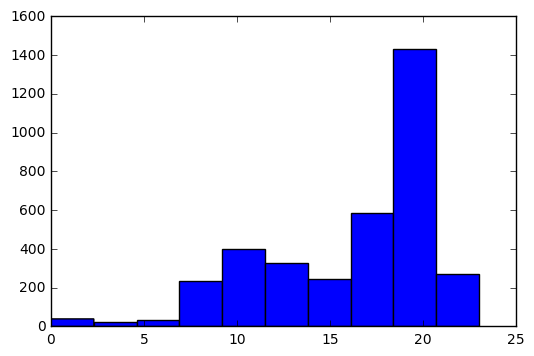

In [29]:
wrepls=[]
for n in range (len(wmaxhs)):
        for i in range(len(wmaxhs[n])):
               wrepls.append(wmaxhs[n][i]) 
hist(wrepls)
show()
# Se calcula una matriz que unifica en un solo arreglo las horas que pertenecen el precio maximo a un solo dia en dias sabados

In [30]:
wrepl1s=[]
for n in range(24):
        wrepl1s.append(wrepls.count(n))
wrepl1s
# Se calcula una matriz de frecuencia en las horas en las que se produce el precio maximo por dia en dias sabados

[15,
 11,
 13,
 11,
 12,
 13,
 19,
 39,
 86,
 110,
 163,
 237,
 202,
 125,
 106,
 87,
 54,
 54,
 533,
 988,
 443,
 188,
 67,
 18]

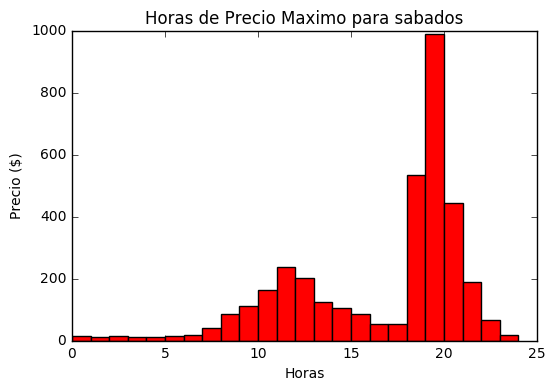

In [31]:
plt.title("Horas de Precio Maximo para sabados")
plt.xlabel("Horas")
plt.ylabel("Precio ($)")
plt.bar(horas, wrepl1s, color = 'r', width = 1)
plt.show()
# Se grafica en formato de barras la matriz de frecuencia de repeticion de horas de precios maximos para dias sabados

**11.--** Haga un histograma que muestre a que horas se produce el máximo precio diario para los días domingo.

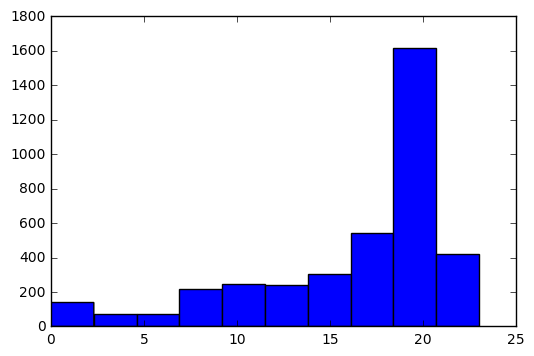

In [32]:
wdom=w[w['Laborable']=='D']
windex3 = ['line_{}'.format(n) for n in range(len(wdom))]
wdom.index = windex3
wmaxhd=[]
wmaxh1d=[]
for n in range(len(wdom)):
    wmaxh1d=pd.Series(wdom.loc['line_'+str(n)]).values[1:25]
    wmaxhd.append ([i for i,e in enumerate(wmaxh1d) if e == max(wmaxh1d)])
wrepld=[]
for n in range (len(wmaxhd)):
        for i in range(len(wmaxhd[n])):
               wrepld.append(wmaxhd[n][i]) 
hist(wrepld)
show()
# Se calcula una matriz que filtra por dias domingos
# Se cambia los indices
# Se filtra para sacar por dia las horas en los cuales aparece el precio maximo en dia domingo
# Se crea una matriz que presenta la frecuencia de repeticion de horas en las cuales se presenta el precio maximo en dia domingo

In [33]:
wrepl1d=[]
for n in range(24):
        wrepl1d.append(wrepld.count(n))
wrepl1d
# Se presenta la matriz de frecuencia en la repeticion de veces en las horas a las cuales se presento el precio maximo en domingo

[57,
 42,
 40,
 37,
 38,
 39,
 36,
 47,
 78,
 95,
 110,
 137,
 124,
 115,
 119,
 108,
 79,
 86,
 458,
 1002,
 614,
 277,
 97,
 45]

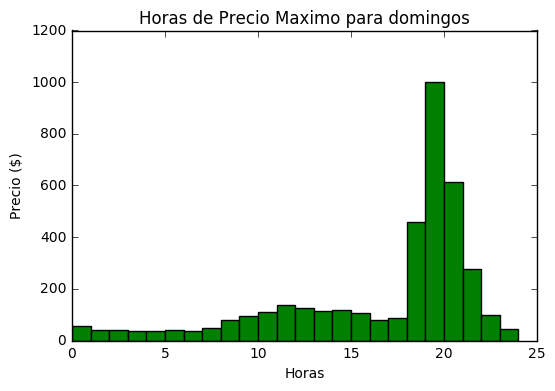

In [34]:
plt.title("Horas de Precio Maximo para domingos")
plt.xlabel("Horas")
plt.ylabel("Precio ($)")
plt.bar(horas, wrepl1d, color = 'g', width = 1)
plt.show()
# Se grafica en formato de barras la frecuencia de repeticion de horas con precio maximo para domingos

**12.--** Imprima una tabla con la fecha y el valor más bajo por año del precio de bolsa.

In [35]:
anio=[]
for n in range(len(wmain['Fecha'])):
    anio.append(str(wmain.iloc[n,0])[0:4])
w['Anio']=anio
wmain['Anio']=anio
wminanio=wmain.groupby('Anio').min()
wminanio=wminanio.min(axis=1)
wminanio
# Se crea una columna adicional que se llama 'Anio' para filtrar por anio el precio promedio
# Se agrupa y se calcula el precio promedio por anio 

Anio
1995     0.000000
1996     0.000000
1997    10.882310
1998    13.847330
1999    18.359530
2000    21.531167
2001    24.822879
2002    26.777682
2003    37.013438
2004    32.252998
2005    27.581415
2006    26.714797
2007    30.173824
2008    29.199135
2009    32.892503
2010    32.024957
2011    33.291100
2012    34.988099
2013    40.415346
2014    38.941951
2015    46.791501
2016    61.100689
2017    61.356315
dtype: float64

**13.--** Haga una gráfica en que se muestre el precio promedio diario y el precio promedio mensual.

In [36]:
windexmain = ['{}'.format(n) for n in range(len(wmain))]
wmain.index = windexmain
del wmain['Anio']
wmain.head()
#Se cambia los indices de la matriz principal y se elimina la columna de anio

,Fecha,0,1,2,3,4,5,6,7,8,...,16,17,18,19,20,21,22,23,key,Laborable
0,1995-07-21,1.073,1.000,1.000,1.00,1.00,1.000,5.000,6.000,6.000,...,1.000,5.000,12.000,16.670,11.929,5.000,1.000,1.000,1995-07,L
1,1995-07-22,1.073,1.073,1.000,1.00,1.00,1.073,1.303,1.303,1.303,...,1.000,1.000,1.303,2.500,2.500,1.303,1.073,1.073,1995-07,S
2,1995-07-23,1.073,1.000,1.000,1.00,1.00,1.000,0.100,1.000,1.000,...,0.100,1.000,1.238,1.238,1.238,1.238,1.073,1.000,1995-07,D
3,1995-07-24,1.000,1.000,0.990,1.00,1.00,1.073,3.000,3.000,3.000,...,3.000,2.000,18.630,22.500,9.256,3.000,1.073,1.000,1995-07,L
4,1995-07-25,0.990,0.990,0.989,0.99,0.99,1.073,1.263,1.263,1.263,...,1.073,1.073,1.263,1.500,1.263,1.263,1.073,0.990,1995-07,L


In [37]:
pmes=[]
for n in range (len(wmain)):  
        y=wmain.groupby('key') 
        f=wmain.loc[y.groups[wmain['key'][n]]].mean()
        f=f.mean()
        pmes.append(f)

pmes
# Se agrupa por mes y anio y se repite el precio promedio mensual para todos los dias del mes para graficarlo en las mismas 
# dimensiones del precio promedio diario

[1.5520871212121214,
 1.5520871212121214,
 1.5520871212121214,
 1.5520871212121214,
 1.5520871212121214,
 1.5520871212121214,
 1.5520871212121214,
 1.5520871212121214,
 1.5520871212121214,
 1.5520871212121214,
 1.5520871212121214,
 7.086462365591399,
 7.086462365591399,
 7.086462365591399,
 7.086462365591399,
 7.086462365591399,
 7.086462365591399,
 7.086462365591399,
 7.086462365591399,
 7.086462365591399,
 7.086462365591399,
 7.086462365591399,
 7.086462365591399,
 7.086462365591399,
 7.086462365591399,
 7.086462365591399,
 7.086462365591399,
 7.086462365591399,
 7.086462365591399,
 7.086462365591399,
 7.086462365591399,
 7.086462365591399,
 7.086462365591399,
 7.086462365591399,
 7.086462365591399,
 7.086462365591399,
 7.086462365591399,
 7.086462365591399,
 7.086462365591399,
 7.086462365591399,
 7.086462365591399,
 7.086462365591399,
 10.955819444444446,
 10.955819444444446,
 10.955819444444446,
 10.955819444444446,
 10.955819444444446,
 10.955819444444446,
 10.955819444444446,
 1

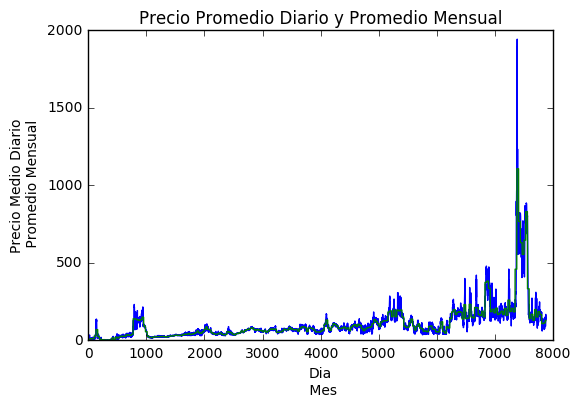

In [38]:
plt.title("Precio Promedio Diario y Promedio Mensual")
plt.xlabel("Dia\n Mes")
plt.ylabel("Precio Medio Diario\n Promedio Mensual")
plt.plot(pd.Series(wmedia).values)
plt.plot(pd.Series(pmes).values)
# Se grafica el precio promedio diario y precio promedio mensual en las mismas dimensiones.